### 模拟数据
使用一些假数据来模拟真实情况

<function matplotlib.pyplot.show(*args, **kw)>

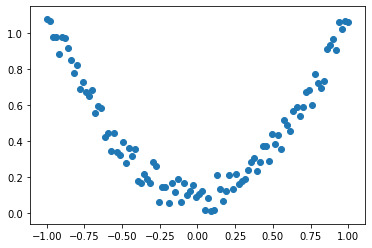

In [24]:
import torch
import torch.nn.functional as F ## 激励函数
import matplotlib.pyplot as plt
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1) #unsqueeze的作用是拓展维度
y=x.pow(2)+0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(),y.data.numpy())
plt.show

##### ___init__()定义所有层的属性
##### forward(x) 搭建层与层之间的关系链接，建立关系时，需要用到激励函数

In [25]:
class Net(torch.nn.Module):  #继承torch module
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()  ##继承init function
        self.hidden = torch.nn.Linear(n_feature,n_hidden) ##隐藏层
        self.predict = torch.nn.Linear(n_hidden,n_output)  ##输出层

    def forward(self,x): #这也是module中的forward function
        #正向传播输入值，nn分析出output
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

net=Net(1,10,1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


## Training

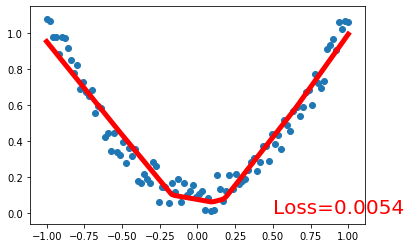

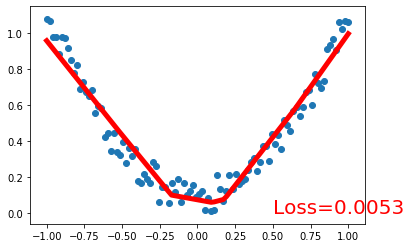

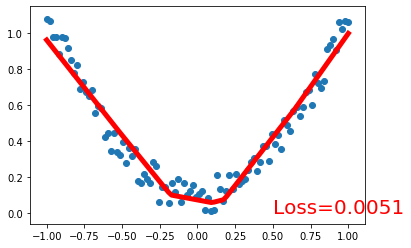

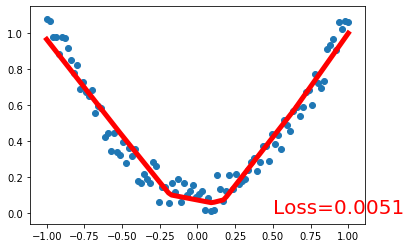

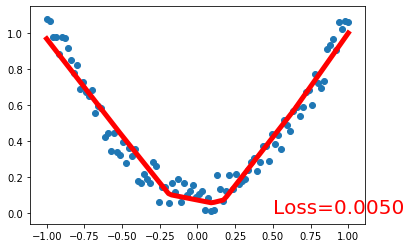

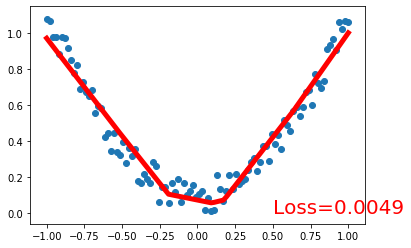

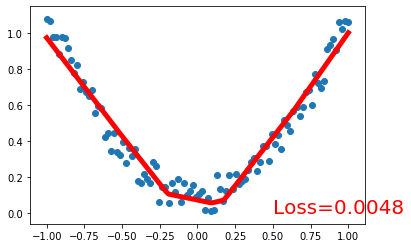

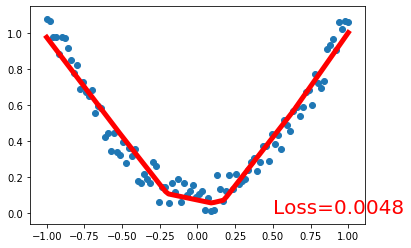

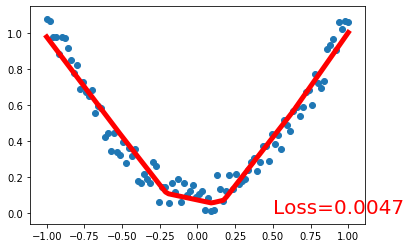

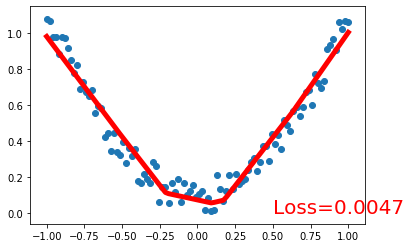

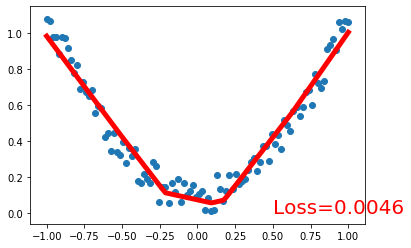

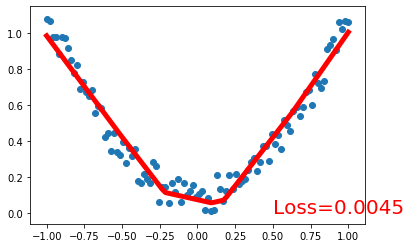

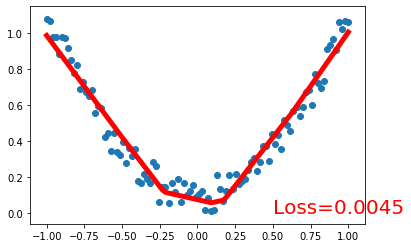

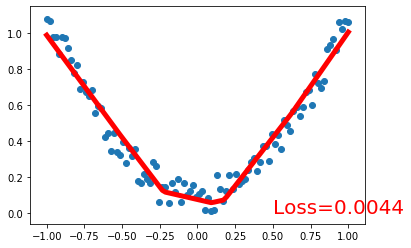

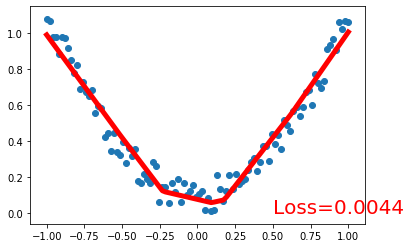

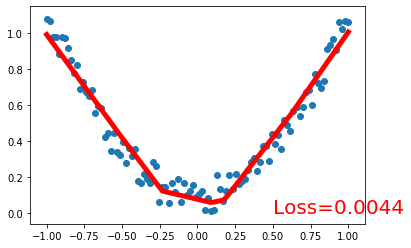

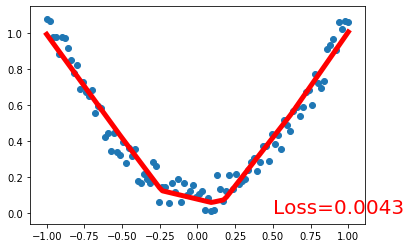

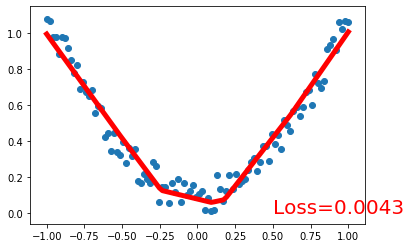

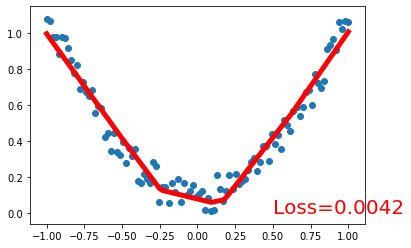

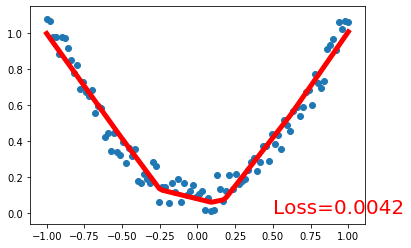

In [27]:
# optimizer用来训练
optimizer = torch.optim.SGD(net.parameters(),lr=0.2) #传入net的参数和learningrate
lossF = torch.nn.MSELoss() #均方差来计算误差


for t in range(100):
    prediction = net(x) #把training set喂给net
    loss= lossF(prediction,y) #计算预测值和真实值的误差

    optimizer.zero_grad()#清空上一次循环的参数值
    loss.backward() #误差反向传播，计算参数更新值
    optimizer.step() #将参数更新值添加到net的参数上

    if t%5==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss=%.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)

plt.ion()
plt.show()